In [8]:
import numpy as np
import pandas as pd
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr


# Reading data set

In [2]:
df=pd.read_csv("/content/sample_data/ifood_df (1).csv")
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [3]:
df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


In [7]:
print(df.columns)
#dropped 2 columns Z revenue and Z cost contact since they had no unique values hence will not be used in analysis

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')


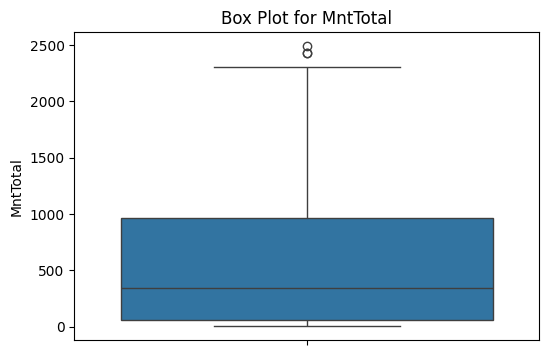

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

In [12]:
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
outliers.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['MntWines'].plot(kind='hist', bins=20, title='MntWines')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Income', y='Recency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Recency', y='MntWines', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='MntWines', y='MntFruits', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Income']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Income')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Recency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Recency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['MntWines']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('MntWines')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['MntFruits']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('MntFruits')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Income'].plot(kind='line', figsize=(8, 4), title='Income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['MntWines'].plot(kind='line', figsize=(8, 4), title='MntWines')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
df = df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


#Visualization and Data Preparing

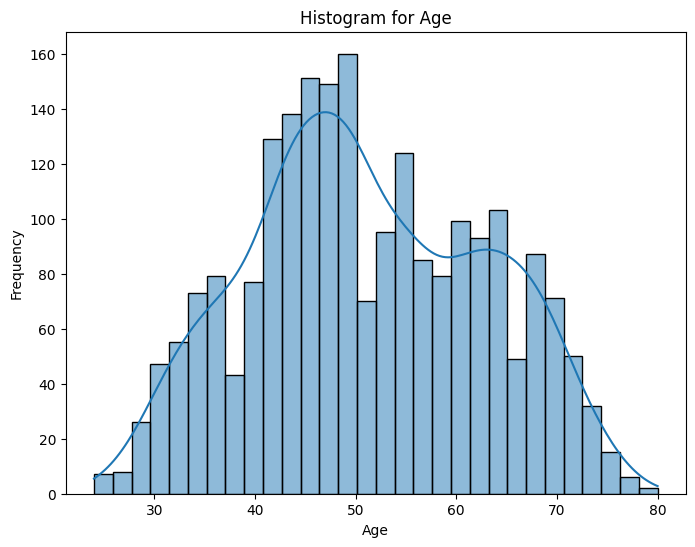

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

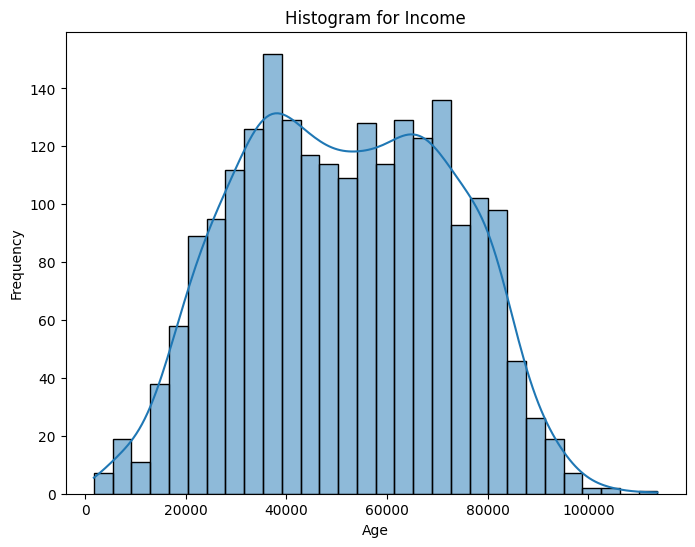

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
df['Frequency'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
display(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Frequency']].head())

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Frequency
0,3,8,10,4,25
1,2,1,1,2,6
2,1,8,2,10,21
3,2,2,0,4,8
4,5,5,3,6,19


In [24]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Manually exclude columns that are categorical counts or binary flags
excluded_cols = [
    'Kidhome', 'Teenhome',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Complain', 'Response', 'AcceptedCmpOverall',
    'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
    'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'
]

numerical_cols_for_outlier_removal = [col for col in numerical_cols if col not in excluded_cols]

print("Numerical columns for outlier removal:")
print(numerical_cols_for_outlier_removal)
def remove_outliers_iqr(df, column):
    """
    Removes outliers from a specified column in a DataFrame using the IQR method.

    Args:
        df: The input pandas DataFrame.
        column: The name of the column to remove outliers from.

    Returns:
        The DataFrame with outliers removed for the specified column.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    return df_filtered

Numerical columns for outlier removal:
['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds', 'Frequency']


In [25]:
df_cleaned = df.copy()

for col in numerical_cols_for_outlier_removal:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

display(df_cleaned.head())
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Frequency
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,6
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,8
8,30351.0,1,0,19,14,0,24,3,3,2,...,0,0,0,0,0,1,44,42,0,6
10,7500.0,0,0,59,6,16,11,11,1,16,...,0,0,1,0,0,0,45,29,0,6
13,17323.0,0,0,38,3,14,17,6,1,5,...,0,0,0,1,0,0,41,36,0,5


Original DataFrame shape: (2202, 38)
Cleaned DataFrame shape: (815, 38)


In [26]:
display(df_cleaned.describe())

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Frequency
count,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,...,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,32334.812270,0.829448,0.439264,48.442945,22.462577,3.719018,14.597546,5.382822,3.684663,11.869939,...,0.024540,0.110429,0.060123,0.488344,0.161963,0.179141,49.846626,37.976687,0.079755,6.802454
std,10995.608929,0.477109,0.525450,28.892606,22.359598,5.424561,11.313708,6.757702,4.741209,11.776909,...,0.154813,0.313617,0.237860,0.500171,0.368643,0.383706,31.220895,27.499756,0.279996,2.068007
min,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,4.000000
25%,24049.500000,1.000000,0.000000,24.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,16.000000,0.000000,5.000000
50%,32303.000000,1.000000,0.000000,48.000000,15.000000,2.000000,11.000000,3.000000,2.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,32.000000,0.000000,7.000000
75%,39395.500000,1.000000,1.000000,75.000000,30.000000,5.000000,19.000000,7.000000,5.000000,17.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,64.500000,51.000000,0.000000,8.000000
max,64587.000000,2.000000,2.000000,99.000000,135.000000,45.000000,67.000000,43.000000,25.000000,69.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,118.000000,2.000000,12.000000


## Customer Segmentation using K-Means

In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df_cleaned is your DataFrame after outlier removal
# Select the key features for clustering
features_for_clustering = ['Recency', 'Frequency', 'MntTotal', 'Income', 'Age']
df_clustering = df_cleaned[features_for_clustering].copy()

# Standardize the features
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Display the first few rows of the scaled data
print("Scaled data for clustering:")
display(pd.DataFrame(df_clustering_scaled, columns=features_for_clustering).head())

Scaled data for clustering:


,Recency,Frequency,MntTotal,Income,Age
0,-0.361662,-0.388271,-0.924520,1.274853,1.676778
1,-0.777248,0.579438,-0.059183,-0.517689,-1.117281
2,-1.019674,-0.388271,-0.187381,-0.180529,-0.185928
3,0.365614,-0.388271,-0.155332,-2.259999,-0.372198
4,-0.361662,-0.872125,-0.283530,-1.366094,-1.396686


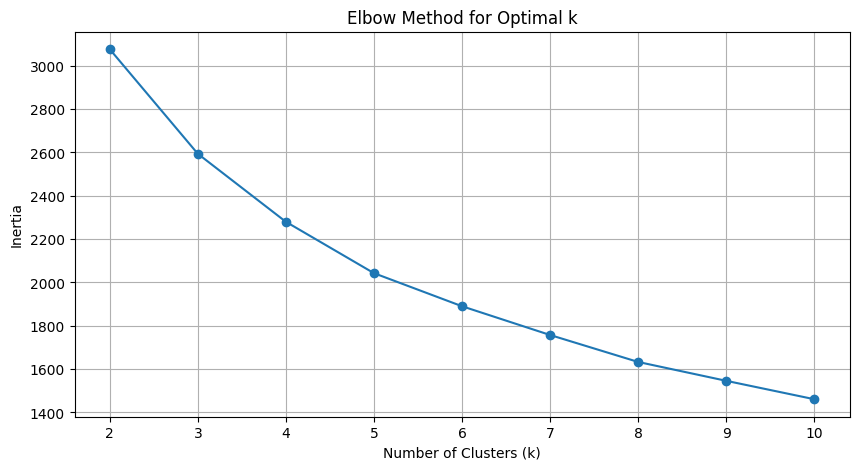

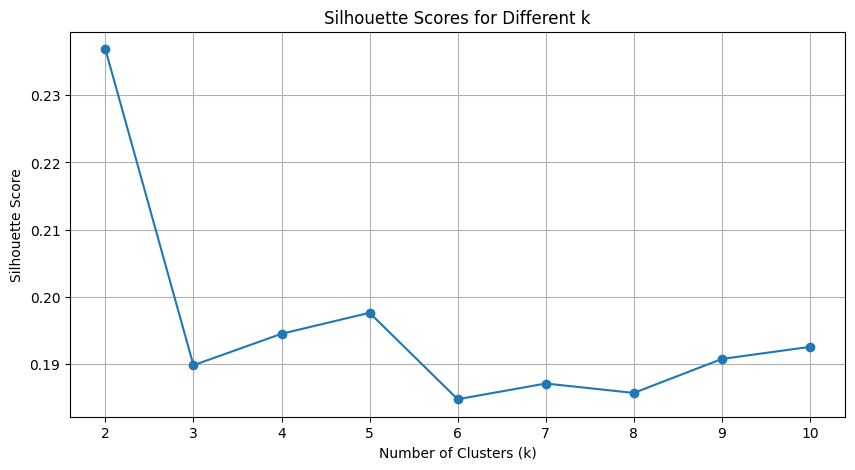

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Test for 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clustering_scaled)
    inertia.append(kmeans.inertia_)
    # Calculate silhouette score
    score = silhouette_score(df_clustering_scaled, kmeans.labels_)
    silhouette_scores.append(score)


# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#Cluster Analysis

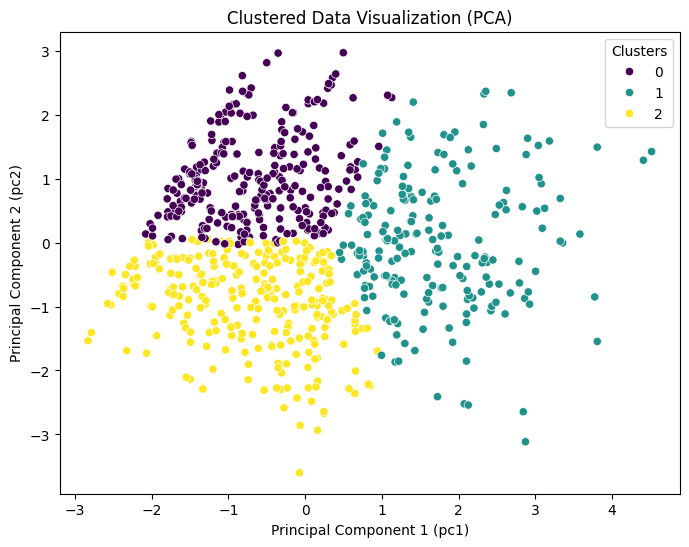

In [33]:
from sklearn.decomposition import PCA

# Assuming you have determined the optimal number of clusters (let's say k=3 for demonstration)
# You should replace 3 with the optimal k you determined from the elbow method and silhouette score plots
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_clustering_scaled)
cluster_labels = kmeans.labels_

# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_clustering_scaled)

# Create a new DataFrame with PCA components and cluster labels
df_pca = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])
df_pca['Cluster'] = cluster_labels

# Now, generate the scatter plot using the df_pca DataFrame
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=df_pca, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization (PCA)')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')
plt.show()

In [39]:
# Define the list of 'Mnt' columns
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Group by cluster and calculate the mean of the 'Mnt' columns
mnt_cluster_analysis = df_cleaned.groupby('Cluster')[mnt_cols].mean()

# Display the results
display(mnt_cluster_analysis)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Cluster,,,,,,
0,15.308772,1.687719,8.231579,2.473684,1.729825,6.585965
1,45.956897,5.103448,24.918103,7.198276,5.094828,17.599138
2,11.013423,4.583893,12.651007,6.751678,4.456376,12.463087


In [40]:
# Add the cluster labels to the original cleaned DataFrame
df_cleaned['Cluster'] = cluster_labels

# Group by cluster and calculate the mean of the clustering features
cluster_analysis = df_cleaned.groupby('Cluster')[features_for_clustering].mean()

# Display the results
display(cluster_analysis)

,Recency,Frequency,MntTotal,Income,Age
Cluster,,,,,
0,50.526316,5.129825,29.431579,35888.378947,52.940351
1,48.551724,8.767241,88.271552,39240.784483,52.232759
2,46.365772,6.872483,39.456376,23559.805369,39.969799


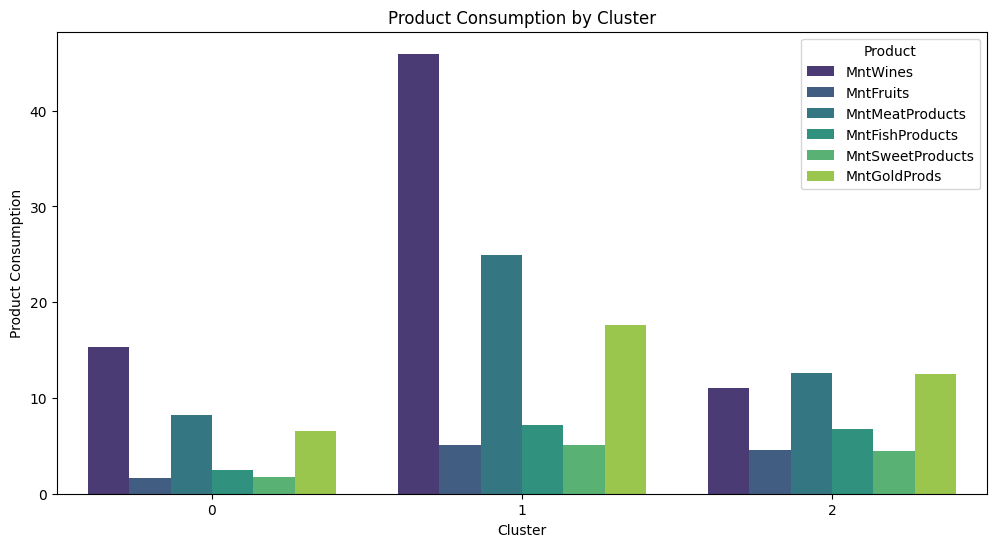

In [44]:
melted_data = pd.melt(mnt_cluster_analysis.reset_index(), id_vars="Cluster", var_name="Product", value_name="Consumption")

plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)
plt.legend(title="Product", loc="upper right")

plt.show()

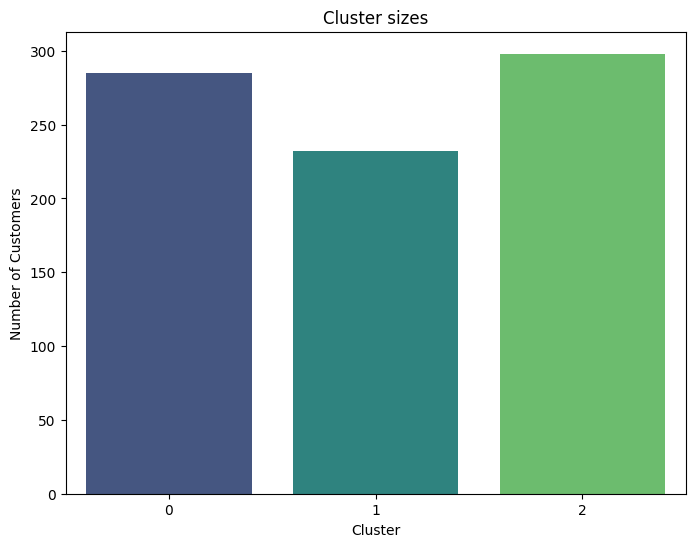

In [45]:
cluster_sizes = df_cleaned.groupby('Cluster').size().reset_index(name='Count')

plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='Count', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [46]:
total_rows = len(df_cleaned)
cluster_sizes['Share%'] = round(cluster_sizes['Count'] / total_rows * 100, 0)
display(cluster_sizes.head())

,Cluster,Count,Share%
0,0,285,35.0
1,1,232,28.0
2,2,298,37.0


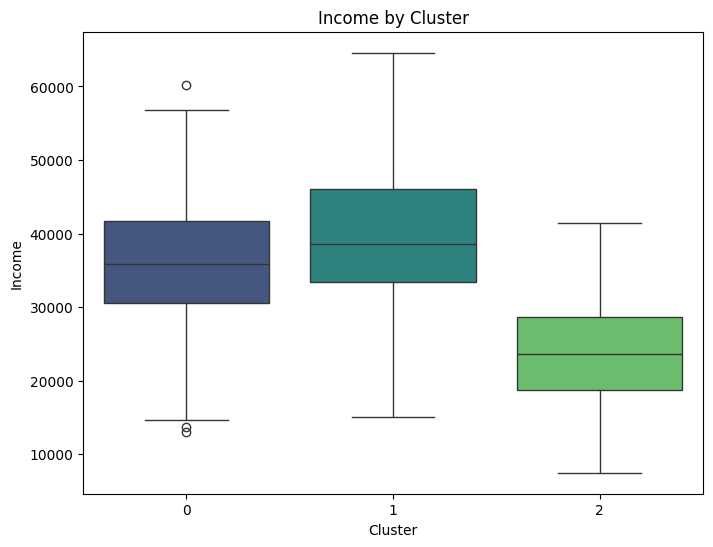

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=df_cleaned, palette='viridis')
plt.title('Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

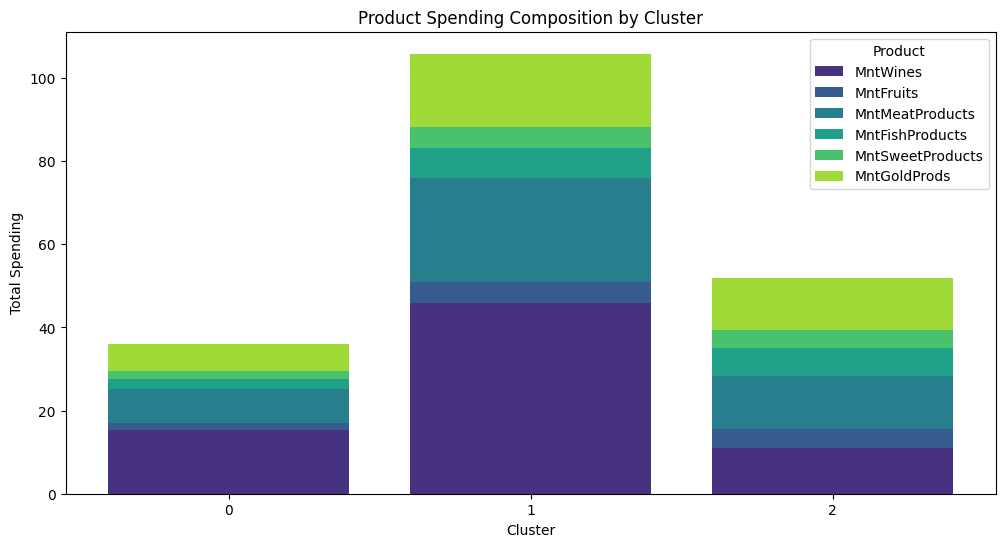

In [ ]:
plt.figure(figsize=(12, 6))

# Stacked bar chart
bottom = None
products = melted_data['Product'].unique()
colors = sns.color_palette('viridis', len(products)) # Get colors from a palette

for i, product in enumerate(products):
    product_data = melted_data[melted_data['Product'] == product]
    plt.bar(product_data['Cluster'], product_data['Consumption'], bottom=bottom, label=product, color=colors[i]) # Assign color manually
    if bottom is None:
        bottom = product_data['Consumption'].values
    else:
        bottom += product_data['Consumption'].values

plt.title("Product Spending Composition by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Spending")
plt.xticks(melted_data['Cluster'].unique())
plt.legend(title="Product", loc="upper right")
plt.show()

**Cluster 0:**

Characteristics: This cluster has a moderate average income and is the oldest group on average. They have the highest average recency, meaning they haven't made a purchase recently compared to other clusters. Their frequency of purchases is the lowest.
Spending Patterns: This group has the lowest average spending across almost all product categories, particularly in wines and meat products. Their spending on gold products is also relatively low.
Size: This is one of the larger clusters, representing about 35% of the customer base.
Interpretation: This segment appears to be older customers who are less engaged and have lower spending habits across all categories. They might be less active customers or those who prefer to shop elsewhere.

**Cluster 1:**

Characteristics: This cluster has the highest average income and is also an older group, similar in age to Cluster 0. They have a moderate average recency and the highest average frequency of purchases.
Spending Patterns: This group stands out for having significantly higher average spending across all product categories, especially in wines, meat products, and gold products.
Size: This is the smallest cluster, representing about 28% of the customer base.
Interpretation: This segment represents high-value, engaged customers who have the highest purchasing frequency and spend the most across all product categories. They are likely the most profitable customer segment.

**Cluster 2:**

Characteristics: This cluster has the lowest average income and is the youngest group on average. They have the lowest average recency, indicating they have made a recent purchase. Their frequency of purchases is moderate.
Spending Patterns: This group has moderate spending across most categories, higher than Cluster 0 but significantly lower than Cluster 1, particularly in wines and meat products. Their spending on fruits, fish, and sweet products is relatively similar to Cluster 1, but their wine and meat spending is much lower.
Size: This is the largest cluster, representing about 37% of the customer base.
Interpretation: This segment appears to be younger customers with lower income who are relatively active (low recency) but have moderate spending habits. They might be price-sensitive or have different product preferences compared to the higher-income cluster.

# **Recommendations**

# Cluster 0: "High-Value Churn Risk"
Re-engagement Campaigns: Since this is an older group with the highest recency, focus on campaigns designed to bring them back. This could include a special "we miss you" email with a personalized discount on their favorite products.

Loyalty Program Incentives: Remind them of their loyalty program status or accumulated points. Offer a bonus to encourage them to make a new purchase and avoid churn.

Targeted Content: Use their past purchase history to send them curated product recommendations that align with their interests, rather than general promotions. Highlight new products they might find interesting.

# Cluster 1: "High-Value Loyal Customers"
Premium Service and Exclusivity: This is your most profitable segment. The goal is to retain and reward them. Offer them exclusive benefits such as early access to new products, a dedicated customer service line, or special VIP events.

Upselling and Cross-selling: Leverage their high spending on specific product categories (e.g., wines, meat products) to cross-sell complementary premium products. For example, suggest a premium cheese to pair with their wine purchases.

Feedback and Co-creation: Engage this group in product development by asking for their feedback on new ideas. This will make them feel valued and further strengthen their loyalty.

# Cluster 2: "Budget-Conscious Starters"
Entry-Level and Value Offers: As a younger, lower-income segment, they are likely more price-sensitive. Use promotions like free shipping with a minimum purchase, "buy one, get one" deals, or bundle low-cost items together to increase their average order value.

Building Brand Affinity: Since they are recent shoppers, focus on building a relationship with them. Use social media and email newsletters to share content that resonates with a younger audience, such as lifestyle tips or user-generated content.

Product Discovery: Encourage them to explore more of your product range by offering small, low-cost sample packs or promotions that introduce them to different product categories. This can help increase their spending over time.